In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
# from census import Census
# from us import states

In [3]:
# states.lookup('DC')

In [4]:
# https://covidtracking.com/api/
df = pd.read_csv('us-daily.csv', \
                 parse_dates=True)

In [19]:
# df

In [6]:
df.columns

Index(['date', 'states', 'positive', 'negative', 'posNeg', 'pending',
       'hospitalized', 'death', 'total', 'hash', 'dateChecked',
       'totalTestResults', 'fips', 'deathIncrease', 'hospitalizedIncrease',
       'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [7]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')

In [8]:
df.index.name = 'Date'

In [9]:
df.sort_index(inplace=True)

In [10]:
df['posNeg_daily'] = df['posNeg'].diff()

In [11]:
df['positive_daily'] = df['positive'].diff()

Text(0.5, 0, 'Date')

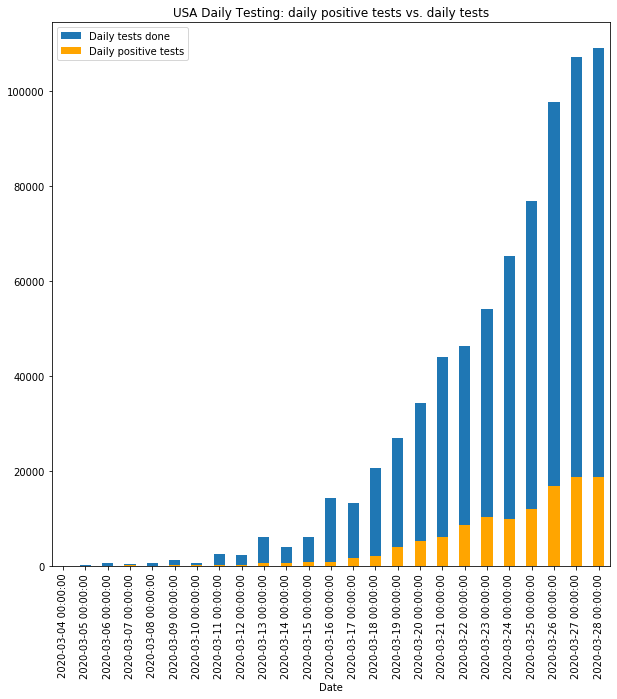

In [12]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

df['posNeg'].diff().plot(label="Daily tests done",kind="bar")
df['positive'].diff().plot(label="Daily positive tests",kind="bar",color="orange")

axes.legend()
axes.set_title("USA Daily Testing: daily positive tests vs. daily tests")
axes.set_xlabel("Date")

(0, 34.50960038579458)

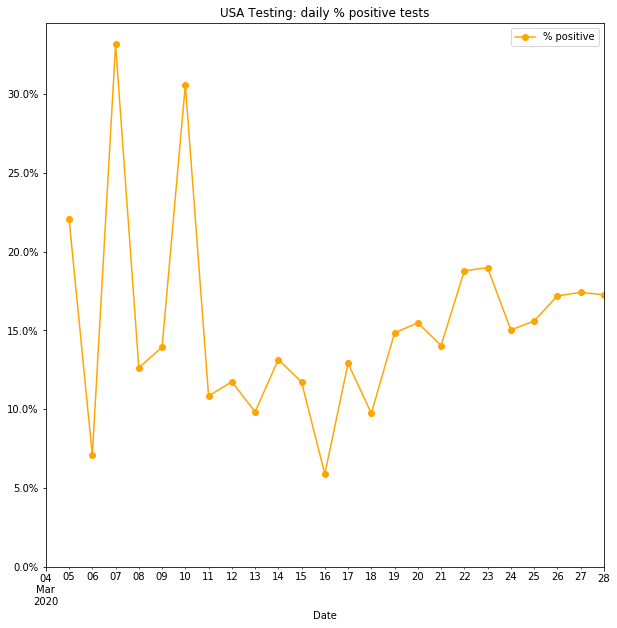

In [18]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

(df['positive'].diff() / df['posNeg'].diff() * 100.).rolling(window=1).mean().plot(marker='o', label="% positive", color="orange")

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("USA Testing: daily % positive tests")
axes.set_xlabel("Date")
axes.set_ylim(0)

In [14]:
# for index, row in df.iterrows():
#     print(pd.to_datetime(row['date'], format='%Y%m%d').strftime("%Y%m%d"), row['posNeg_daily'])